In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data.csv')

# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing calories with median (since mean could be skewed by outliers)
df['Calories'].fillna(df['Calories'].median(), inplace=True)

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


/tmp/ipykernel_25307/1953503124.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Calories'].fillna(df['Calories'].median(), inplace=True)


In [5]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,374.098225
std,42.299949,14.510259,16.450434,262.565937
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


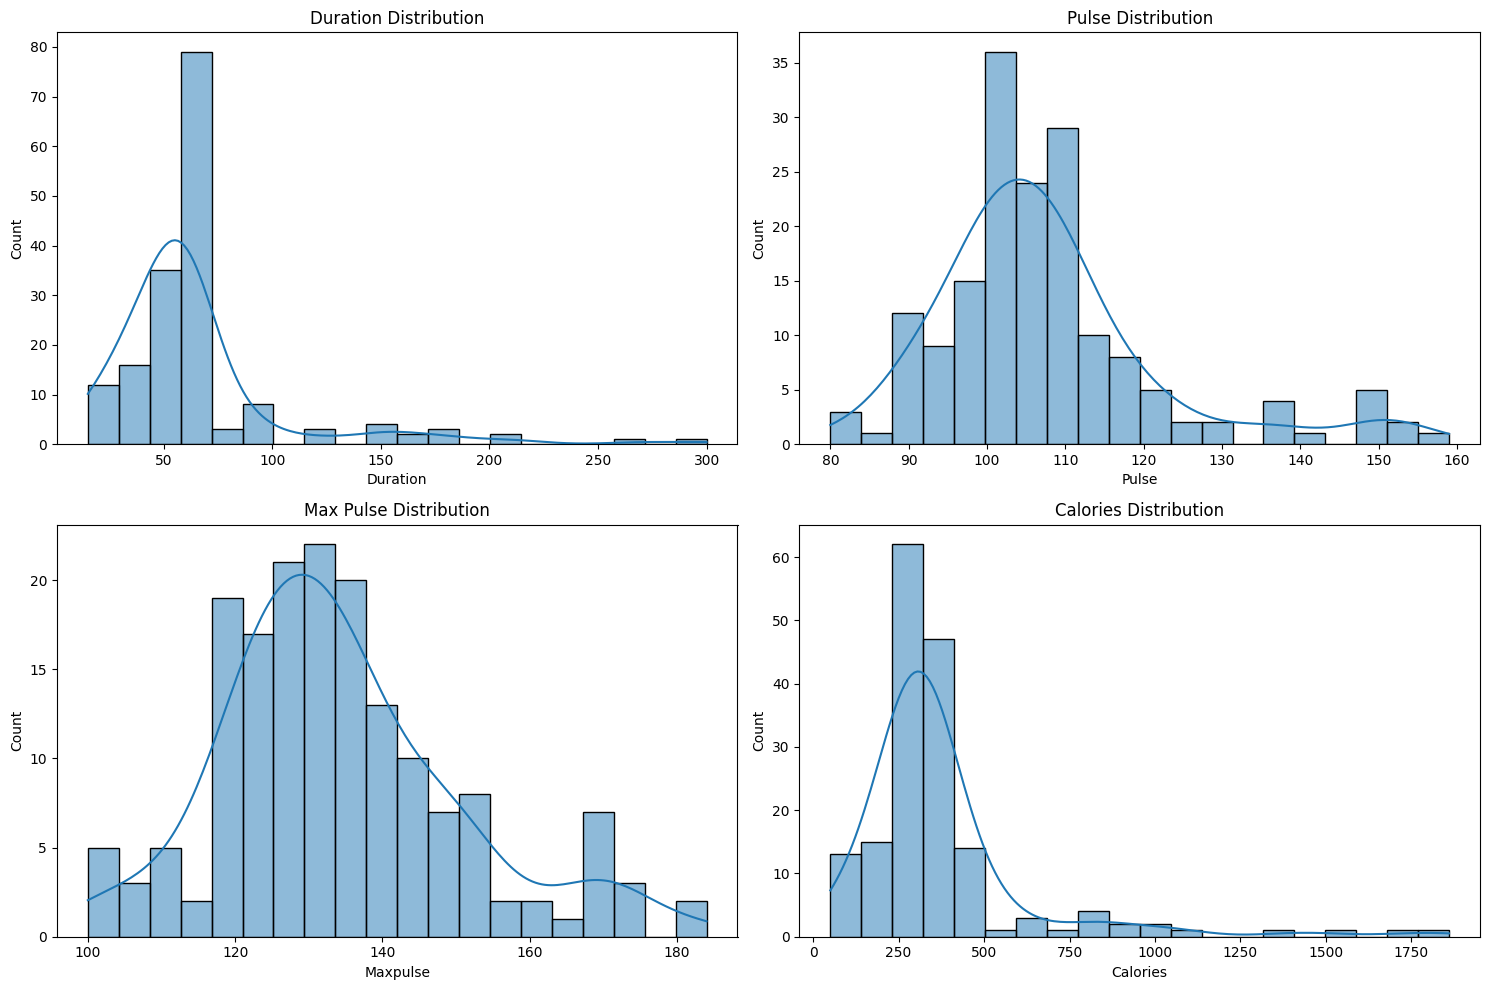

In [6]:
# Set up the figure
plt.figure(figsize=(15, 10))

# Histograms
plt.subplot(2, 2, 1)
sns.histplot(df['Duration'], bins=20, kde=True)
plt.title('Duration Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Pulse'], bins=20, kde=True)
plt.title('Pulse Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Maxpulse'], bins=20, kde=True)
plt.title('Max Pulse Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Calories'], bins=20, kde=True)
plt.title('Calories Distribution')

plt.tight_layout()
plt.show()

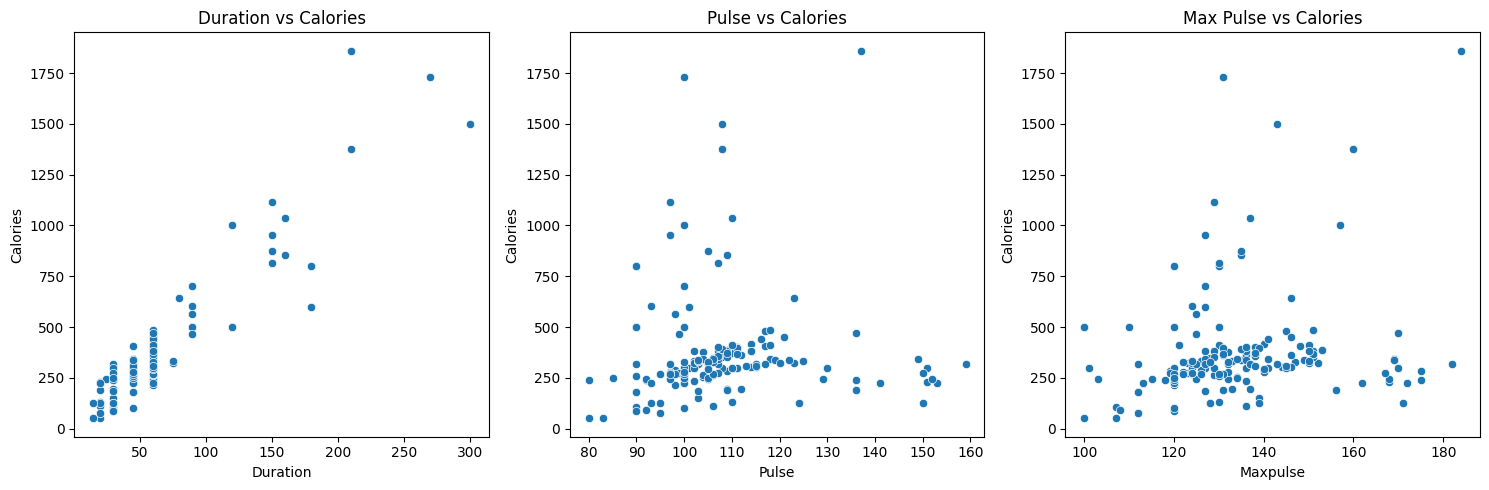

In [7]:
# Scatter plots to examine relationships
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Duration', y='Calories', data=df)
plt.title('Duration vs Calories')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Pulse', y='Calories', data=df)
plt.title('Pulse vs Calories')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Maxpulse', y='Calories', data=df)
plt.title('Max Pulse vs Calories')

plt.tight_layout()
plt.show()

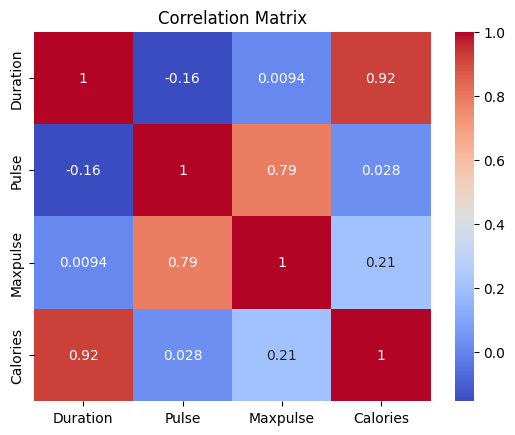

In [8]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Analyze by duration buckets
duration_bins = [0, 30, 60, 90, 120, 300]
df['DurationGroup'] = pd.cut(df['Duration'], bins=duration_bins)
duration_stats = df.groupby('DurationGroup').agg({
    'Calories': ['mean', 'median', 'count'],
    'Pulse': 'mean',
    'Maxpulse': 'mean'
})
duration_stats

/tmp/ipykernel_25307/2752797722.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_stats = df.groupby('DurationGroup').agg({


Calories                    Pulse    Maxpulse
                      mean median count        mean        mean
DurationGroup                                                  
(0, 30]         173.475000  186.6    28  115.642857  139.750000
(30, 60]        319.518421  318.6   114  106.543860  132.973684
(60, 90]        511.663636  500.3    11  101.636364  125.181818
(90, 120]       666.833333  500.4     3  100.000000  139.000000
(120, 300]     1100.876923  953.2    13  104.538462  137.538462